In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [51]:
df = pd.read_csv('sample_linear_regression.csv')
df

,Feature_X,Target_y
0,3.745401,20.195951
1,9.507143,39.975993
2,7.319939,32.711549
3,5.986585,25.965478
4,1.560186,12.240981
...,...,...
95,4.937956,23.467036
96,5.227328,25.218547
97,4.275410,22.305088
98,0.254191,8.166360


In [52]:
#split df into feature/independant and target/dependant
x = df.iloc[:,:-1].values
x[0:5]

array([[3.74540119],
       [9.50714306],
       [7.31993942],
       [5.98658484],
       [1.5601864 ]])

In [53]:
y = df.iloc[:,1].values
y[0:5]

array([20.19595123, 39.97599337, 32.71154874, 25.96547803, 12.24098053])

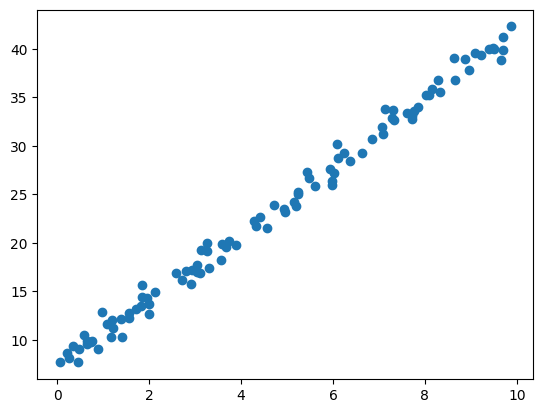

In [54]:
plt.scatter(x, y)

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [11]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [12]:
model.fit(x_train, y_train)

LinearRegression()

In [13]:
model.predict([[2],[4],[6],[8]])

array([14.16422905, 21.05674567, 27.94926229, 34.84177891])

In [14]:
y_pred = model.predict(x_test)

In [15]:
error = y_pred - y_test
error

array([ 0.50711888, -1.27898584, -0.21343427, -0.29228134, -0.46651656,
        0.72380874,  0.8102606 , -0.463515  ,  1.5010543 ,  0.82214861,
        0.29429274,  0.1082418 , -0.21400559, -0.35566963,  0.32448494,
       -1.94097835,  0.1095955 ,  1.44198345, -0.16378878,  0.75715666])

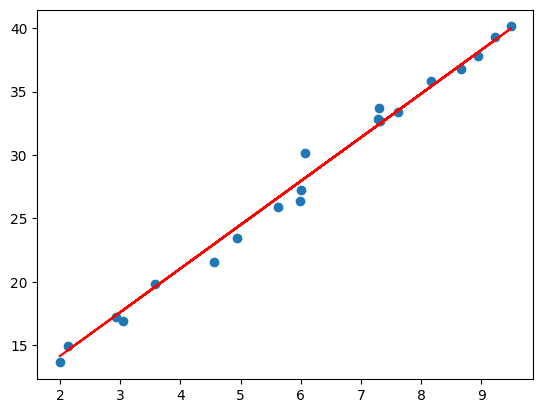

In [16]:
plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, color = 'red')

In [17]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
r2

0.9902462282147072

In [31]:
# Custom linear regression class
class CustomLinearRegression:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.w = None
        self.b = None

    def fit(self, X, y):
        # Convert to NumPy arrays
        X = np.array(X)
        y = np.array(y)

        # Check for invalid inputs
        if np.isnan(X).any() or np.isnan(y).any():
            raise ValueError("Input contains NaN values. Please clean your data.")
        if np.isinf(X).any() or np.isinf(y).any():
            raise ValueError("Input contains infinity values. Please clean your data.")
        if len(X) != len(y):
            raise ValueError("X and y must have the same number of samples.")
        
        # Flatten X if it’s 2D with a single feature
        if X.ndim == 2 and X.shape[1] == 1:
            X = X.flatten()

        # Initialize parameters
        self.w = 0
        self.b = 0
        n = len(y)

        # Gradient Descent
        for epoch in range(self.epochs):
            y_pred = self.w * X + self.b
            dw = (-2 / n) * np.sum(X * (y - y_pred))
            db = (-2 / n) * np.sum(y - y_pred)

            # Update parameters
            self.w -= self.learning_rate * dw
            self.b -= self.learning_rate * db

    def predict(self, X):
        # Convert X to a NumPy array
        X = np.array(X)

        # Check for invalid inputs
        if np.isnan(X).any():
            raise ValueError("Input contains NaN values. Please clean your data.")
        if np.isinf(X).any():
            raise ValueError("Input contains infinity values. Please clean your data.")
        
        # Flatten X if it’s 2D with a single feature
        if X.ndim == 2 and X.shape[1] == 1:
            X = X.flatten()
        
        # Calculate predictions
        return self.w * X + self.b


In [32]:
model = CustomLinearRegression(learning_rate=0.01, epochs=1000)
model.fit(x_train, y_train)

In [33]:
model.predict([[2],[4],[6],[8]])

array([14.15589819, 21.05223424, 27.94857028, 34.84490633])

In [34]:
y_pred = model.predict(x_test)

In [35]:
custom_error = y_pred - y_test
custom_error

array([ 0.49878179, -1.27720274, -0.21160556, -0.28682647, -0.46474489,
        0.72237724,  0.80392047, -0.46009231,  1.5003222 ,  0.81942841,
        0.2992311 ,  0.11062033, -0.2193102 , -0.36376485,  0.32887615,
       -1.94152626,  0.10302434,  1.4385428 , -0.15781807,  0.75648595])

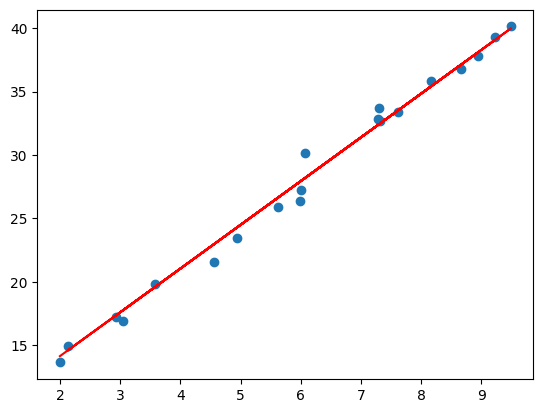

In [36]:
plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, color = 'red')

In [37]:
compare_error = error-custom_error
compare_error

array([ 0.00833709, -0.0017831 , -0.0018287 , -0.00545487, -0.00177167,
        0.0014315 ,  0.00634013, -0.00342269,  0.00073211,  0.0027202 ,
       -0.00493836, -0.00237853,  0.00530462,  0.00809522, -0.0043912 ,
        0.00054792,  0.00657116,  0.00344065, -0.00597071,  0.00067071])